<a href="https://colab.research.google.com/github/wmpjrufg/MCOMP001/blob/main/Aposentadoria_(desafio_incompleto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 3: Simulador de aposentadoria

Esse notebook tem como objetivo ser aplicado quando esse curso for ministrado no formato de _hands on_. Aqui é apresentada a solução do notebook.

# Declaração de variáveis

In [1]:
saldo = 1000000        # Saldo inicial da conta de aposentadoria
taxaJuros = 0.04       # Taxa de juros anual (4% ao ano)
anos = 30              # Quantidade de anos para a aposentadoria
saqueMensal = 10000    # Valor mensal a ser sacado na aposentadoria

## Relatório dos dados de entrada

In [2]:
print('saldo inicial (R$): ', saldo)
print('taxa de juros (a.a): ', taxaJuros * 100, '%')
print('tempo do cenário (anos): ', anos)
print('saques mensais (R$): ', saqueMensal)

saldo inicial (R$):  1000000
taxa de juros (a.a):  4.0 %
tempo do cenário (anos):  30
saques mensais (R$):  10000


## Relatório da evolução do saldo sem custos

Aqui precisamos saber qual será a evolução do saldo caso não façamos nenhum saque no período. A correção do saldo é dado conforme a seguinte equação, onde $s^{t}$ indica o saldo do anual atual, $s^{t+1}$ indica o saldo do anual atualizado para o ano subsequente e $t_j$ indica a taxa de juro fixada.

$s^{t+1} = s^t + s^t \cdot t_j$

In [3]:
for ano in range(1, anos + 1):
     saldo =  saldo + saldo * taxaJuros
     print('R$: ', saldo)

R$:  1040000.0
R$:  1081600.0
R$:  1124864.0
R$:  1169858.56
R$:  1216652.9024
R$:  1265319.018496
R$:  1315931.77923584
R$:  1368569.0504052737
R$:  1423311.8124214846
R$:  1480244.284918344
R$:  1539454.056315078
R$:  1601032.218567681
R$:  1665073.5073103884
R$:  1731676.4476028038
R$:  1800943.505506916
R$:  1872981.2457271926
R$:  1947900.4955562802
R$:  2025816.5153785315
R$:  2106849.1759936726
R$:  2191123.1430334193
R$:  2278768.068754756
R$:  2369918.791504946
R$:  2464715.543165144
R$:  2563304.1648917496
R$:  2665836.3314874195
R$:  2772469.7847469165
R$:  2883368.576136793
R$:  2998703.3191822646
R$:  3118651.4519495554
R$:  3243397.5100275376


## Relatório da evolução do saldo com custos

Vamos impor a condição de que o saque mensal seja aplicado ao longo dos 30 anos. Qual seria o valor final?

In [4]:
# aqui tem que rodar duas vezes para ver o  erro do saldo
saldo = 1000000
for ano in range(1, anos + 1):
    saldo =  saldo + saldo * taxaJuros
    saldo -= saqueMensal * 12
    print('Saldo anual atualizado: R$ ', saldo)

Saldo anual atualizado: R$  920000.0
Saldo anual atualizado: R$  836800.0
Saldo anual atualizado: R$  750272.0
Saldo anual atualizado: R$  660282.88
Saldo anual atualizado: R$  566694.1952
Saldo anual atualizado: R$  469361.96300799993
Saldo anual atualizado: R$  368136.4415283199
Saldo anual atualizado: R$  262861.8991894527
Saldo anual atualizado: R$  153376.37515703082
Saldo anual atualizado: R$  39511.43016331206
Saldo anual atualizado: R$  -78908.11263015546
Saldo anual atualizado: R$  -202064.43713536166
Saldo anual atualizado: R$  -330147.0146207761
Saldo anual atualizado: R$  -463352.8952056072
Saldo anual atualizado: R$  -601887.0110138315
Saldo anual atualizado: R$  -745962.4914543848
Saldo anual atualizado: R$  -895800.9911125602
Saldo anual atualizado: R$  -1051633.0307570626
Saldo anual atualizado: R$  -1213698.3519873451
Saldo anual atualizado: R$  -1382246.286066839
Saldo anual atualizado: R$  -1557536.1375095125
Saldo anual atualizado: R$  -1739837.583009893
Saldo anual

## Verificando o critério de inviabilidade do cenário atual de aposentadoria

In [5]:
for ano in range(1, anos + 1):
    saldo += saldo * (taxaJuros)
    saldo -= saqueMensal * 12

if saldo < 0:
    resultado = "insuficiente"
elif saldo > 0:
    resultado = "suficiente"

print(f"Após {anos} anos de aposentadoria, o saldo é de R$ {saldo:.2f}.")
print(f"Seu plano de aposentadoria é {resultado}.")

Após 30 anos de aposentadoria, o saldo é de R$ -18039254.82.
Seu plano de aposentadoria é insuficiente.


## Implementando o recurso de função

In [6]:
def simulador_aposentadoria(saldo, taxaJuros, anos, saqueMensal):
    """
    Esta função determina o saldo de uma aposentadoria considerando um valor saqueMensal por mês.

    Entrada:
    saldo       -> float
    taxaJuros   -> float
    anos        -> int
    saqueMensal -> float

    Saída:
    saldos   -> list
    resultdo -> string
    """
    saldos = []

    for ano in range(1, anos + 1):
        saldo += saldo * (taxaJuros)
        saldo -= saqueMensal*12
        saldos.append(saldo)

    if saldo > 0:
      resultado = "suficiente"
    else:
      resultado = "insuficiente"

    return saldos, resultado

### _Exemplo de uso_

In [7]:
saldo = 1000000
taxa = 0.08
tempo = 15
saqueMes = 12000

saldos, resultado = simulador_aposentadoria(saldo, taxa, tempo, saqueMes)

# Imprimindo resultados
print(f"Após {anos} anos de aposentadoria, o saldo é de R${saldos[-1]:.2f}.")
print(f"Seu plano de aposentadoria é {resultado}.")

Após 30 anos de aposentadoria, o saldo é de R$-737735.29.
Seu plano de aposentadoria é insuficiente.


## Plotagem

Para ver o cenário financeiro vamos usar o recurso gráfico do Python: ```import matplotlib.pyplot as plt```

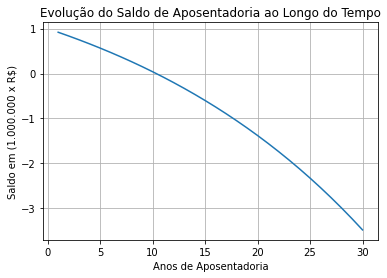

In [10]:
# Vamos usar uma biblioteca: Matplotlib!
import matplotlib.pyplot as plt

# Chamando a função e guardando as funções em variáveis
saldos, resultado = simulador_aposentadoria(1000000, 0.04, 30, 10000)
saldos = [i / 1e6 for i in saldos]

# Plotagem do gráfico
anos_simulados = list(range(1, len(saldos) + 1))
plt.plot(anos_simulados, saldos)
plt.xlabel("Anos de Aposentadoria")
plt.ylabel("Saldo em (1.000.000 x R$)")
plt.title("Evolução do Saldo de Aposentadoria ao Longo do Tempo")
plt.grid(True)
plt.show()